In [2]:
import numpy
import numpy as np
from scipy import linalg
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import math
from scipy import integrate
import functools

In [3]:

################################################ZUODONG CODE
def prox_quad(x, c):
    return x / (1 + c)


def prox_quad_prime(x, c):
    return 1 / (1 + c)


def prox_abs(x, c):
    return np.sign(x)(np.max((0, np.abs(x) - c)))


def prox_abs_prime(x, c):
    if (x > c) | (-x > c):
        return 1
    return 0

In [4]:
def F_r(t, r):
    return stats.norm.cdf(t / r) + np.exp(r ** 2 / 2) / 2 * (
                np.exp(t) * stats.norm.pdf(-(t + r ** 2) / r) - np.exp(-t) * stats.norm.cdf((t - r ** 2) / r))

In [15]:
def F_kappa(t, r, kappa):
    return F_r(t, r) - (1 + kappa) / 2


def bisection_inverse_F_bar(a, b, r, kappa, stepmax=100, tol=1e-5):
    if np.sign(F_kappa(a, r, kappa)) == 0: return a
    if np.sign(F_kappa(b, r, kappa)) == 0: return b

    if np.sign(F_kappa(a, r, kappa)) * np.sign(F_kappa(b, r, kappa)) > 0: return print("no root")

    for step in range(1, stepmax + 1):

        c = (a + b) / 2

        if np.sign(F_kappa(c, r, kappa)) == 0: return c

        if np.abs((b - a) / 2) < tol: return (b + a) / 2

        if np.sign(F_kappa(c, r, kappa)) * np.sign(F_kappa(a, r, kappa)) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2

In [16]:
def F_r_final(r, kappa):
    a_inf = -100
    b_max = 100
    T = bisection_inverse_F_bar(a_inf, b_max, r, kappa)
    G = functools.partial(F_r, r)
    fun = lambda x: x * G(x)
    return kappa * r ** 2 - 4 * integrate.quad(fun, 0, T)[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underes

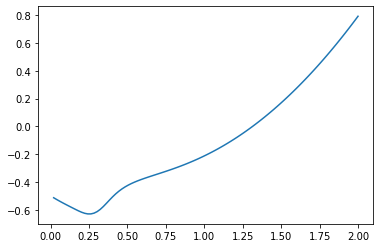

In [19]:
kappa = 0.5
r_values = np.linspace(0,2,num=100)
F_r_final_values = [F_r_final(r, kappa) for r in r_values]
plt.plot(r_values, F_r_final_values)

In [22]:
def bisection_r(kappa, stepmax=100, tol=1e-5):
    a = 0.1
    b = 1.5

    if np.sign(F_r_final(a, kappa)) == 0: return a
    if np.sign(F_r_final(b, kappa)) == 0: return b
    # print(F_r_final(a,kappa),"\n")
    # print(F_r_final(b,kappa),"\n")

    if np.sign(F_r_final(a, kappa)) * np.sign(F_r_final(b, kappa)) > 0: return print("no root")

    for step in range(1, stepmax + 1):

        c = (a + b) / 2

        # print(F_r_final(c,kappa),"\n")
        if np.sign(F_r_final(c, kappa)) == 0: return c

        if np.abs((b - a) / 2) < tol: return (b + a) / 2

        if np.sign(F_r_final(c, kappa)) * np.sign(F_r_final(a, kappa)) < 0:
            b = c
        else:
            a = c

    return (a + b) / 2

print(bisection_r(0.5))

1.3135871887207031
